## Pneumonia Classifier

#### Arthur Gomes Chieppe
#### Fernando Peres Marques Gameiro França
#### Francisco Augusto Buzolin Vasconcellos da Costa
#### Vínicius Grando Eller

Importando Biblioteca e baixando Arquivos Necessários

In [ ]:
import cv2 #This module provides better ways to deal and solve computer vision problems
import matplotlib.pyplot as plt #Creates static, animated, and interactive visualizations in a easy way
import numpy as np #NumPy brings the computational power of languages like C and Fortran to Python
import os #This module provides a portable way of using operating system dependent functionality.
import pandas as pd #Pandas provides ways of data manipulation and analysis
import seaborn as sns #Seaborn is also to data visualization, but based on matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import tensorflow as tf #Tensorflow an end-to-end open source machine learning plataform
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plt.style.use('ggplot')

Criando arrays de Treino e Teste

In [ ]:
categories = ['PNEUMONIA', 'NORMAL'] # Index 0-Pulmão Pneumonico e 1-Pulmão Normal
img_size = 150 # Redimensionando a imagem para 150x150 pixels

def images_manipulation(data_dir):
  """
  Inicia o projeto, extraindo as imagens da base de dados (data_dir)
  e as converte para o tamanho desejado, contabilizando a quantia 
  em cada classificação
  """
    data = [] 
    number_of_normal = 0
    number_of_pneumonia = 0

    for category in categories: 
        path = os.path.join(data_dir, category)
        lista = os.listdir(path)

        if category == "NORMAL":
          number_of_normal += len(lista)
        else:
          number_of_pneumonia += len(lista)

        class_num = categories.index(category)
        for img in os.listdir(path):
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_image, class_num])
                
    return np.array(data), number_of_normal, number_of_pneumonia

# A função é chamada duas vezes, com o intuito de separar os dados de teste e os dados de treino
test_data, number_of_normal_test, number_of_pneumonia_test = images_manipulation('content/chest_xray/test')
train_data, number_of_normal_train, number_of_pneumonia_train = images_manipulation('content/chest_xray/train')

Visualizando Exemplos de Pulmões do Dataset

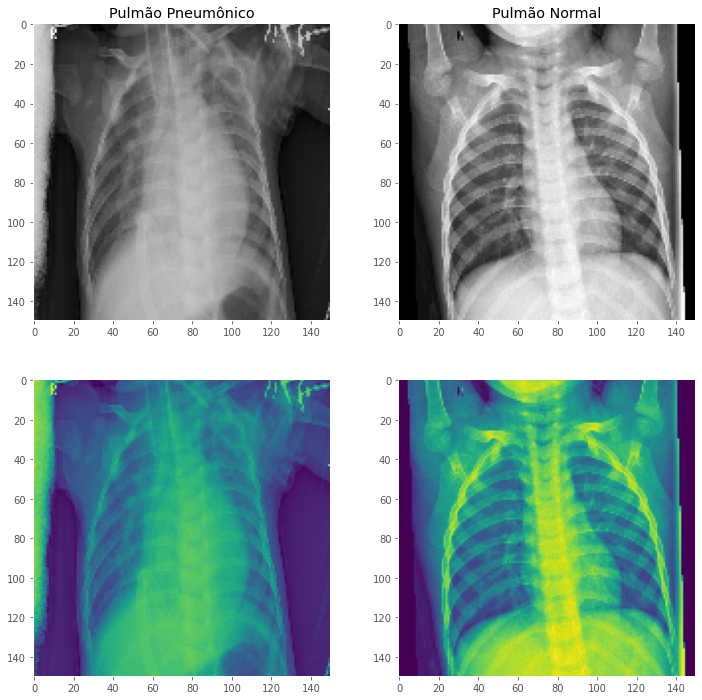

Classificação -> 0 = Pneumonia
Classificação -> 1 = Normal


In [ ]:
# Espaço para mostrar uma melhor visualização do que está contido na base de dados
# Apresentado em duas tonalidades para que qualquer pessoa possa visualizar o contraste 
plt.figure(figsize=(12, 12))

# Mostra duas imagens em cinza
plt.subplot(221)
plt.imshow(test_data[200][0], cmap='gray')
plt.grid(False)
plt.title("Pulmão Pneumônico")

plt.subplot(222)
plt.imshow(test_data[-2][0], cmap='gray')
plt.grid(False)
plt.title("Pulmão Normal")


# Mostra duas imagens em RGB
plt.subplot(223)
plt.grid(False)
plt.imshow(test_data[200][0])

plt.subplot(224)
plt.grid(False)
plt.imshow(test_data[-2][0])

plt.show()
print(f"Classificação -> {test_data[200][1]} = Pneumonia")
print(f"Classificação -> {test_data[-2][1]} = Normal")

Visualizando quantidade de exemplos nos Datasets

In [ ]:
# Visualizando a quantidade de imagens em cada Base, por classificação

print(f"Número de Pulmões Normais no Treino: {number_of_normal_train}")
print(f"Número de Pulmões Pneumônicos no Treino: {number_of_pneumonia_train}")
print(f"Número de Pulmões Normais no Teste: {number_of_normal_test}")
print(f"Número de Pulmões Pneumônicos no Teste: {number_of_pneumonia_test}")

Número de Pulmões Normais no Treino: 1341
Número de Pulmões Pneumônicos no Treino: 3875
Número de Pulmões Normais no Teste: 234
Número de Pulmões Pneumônicos no Teste: 390


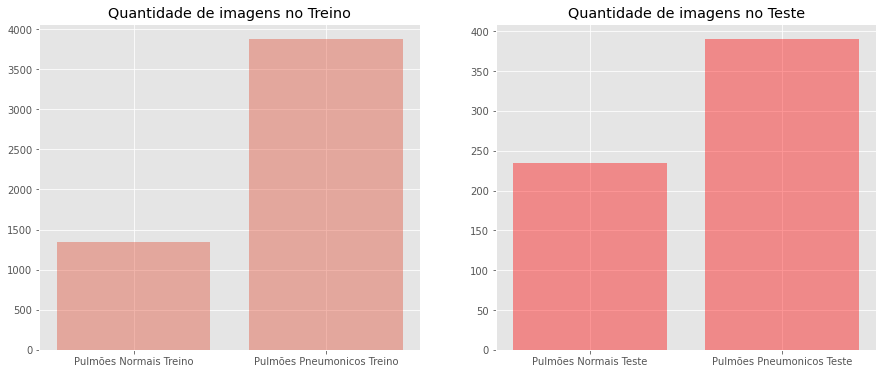

In [ ]:
"""Cria um dicionario para plotar o gráfico de barras, sendo que sua chave é a 
classificação e a base a qual ela pertence, e o valor é a quantia de dados que
tem nas especificações"""

train_bars_dictionary = {'Pulmões Normais Treino':number_of_normal_train,
                     'Pulmões Pneumonicos Treino':number_of_pneumonia_train}
test_bars_dictionary = {'Pulmões Normais Teste':number_of_normal_test,
                     'Pulmões Pneumonicos Teste':number_of_pneumonia_test} 

train_names = train_bars_dictionary.keys()
train_values = train_bars_dictionary.values()
test_names = test_bars_dictionary.keys()
test_values = test_bars_dictionary.values()

plt.figure(figsize=(15, 6))

# Plot de análise exploratória para melhor visualização da base de dados

plt.subplot(121)
plt.bar(train_names, train_values, alpha=.4) 
plt.title("Quantidade de imagens no Treino")
plt.subplot(122)
plt.bar(test_names, test_values, color="r", alpha=.4) 
plt.title("Quantidade de imagens no Teste")

plt.show()


Visualizando quantidade de pixels por intensidade da cor

In [ ]:
"""O loop a seguir passa por cada um dos 22500 pixels em uma imagem 
e analisa a tonalidade da escala de cinza, encontrando a quantidade de pixels com tonalidade igual.
Isto foi feito para todas as imagens, e agrupadas por suas classificações. 
O print("Teste Pronto"), foi usado para analisar o tempo de resposta do código"""

quantidade_pixel_intensidade_normal = [0]*256
quantidade_pixel_intensidade_pneumonia = [0]*256

for imagem in test_data:
    if imagem[1] == 0: 
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_pneumonia[pixel] += 1
    else:
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_normal[pixel] += 1

print("Teste Pronto")

for imagem in train_data:
    if imagem[1] == 0: 
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_pneumonia[pixel] += 1
    else:
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_normal[pixel] += 1

print("Treino Pronto")

Teste Pronto
Treino Pronto


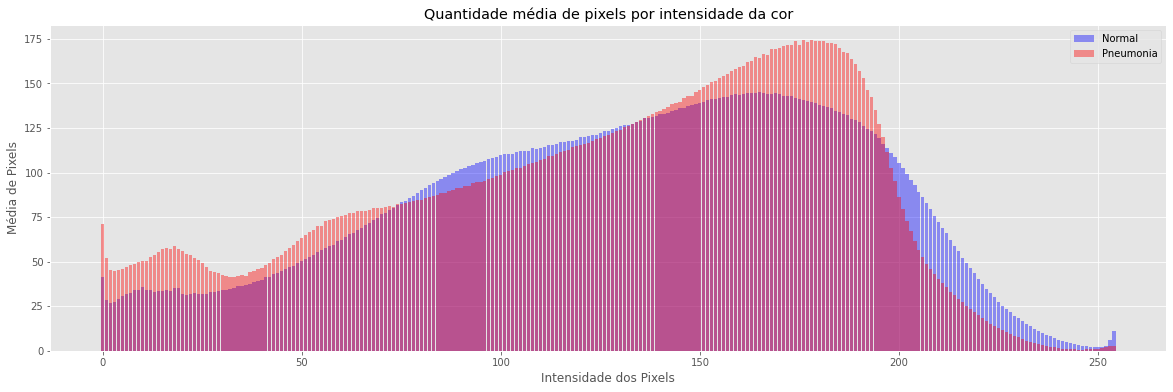

In [ ]:
"""Este gráfico demonstra a quantia media de pixels do dataset, para cada 
tonalidade de escala de cinza, neste caso foi somado os diretórios Teste e treino, visto 
que ainda é uma análise exploratória"""

total_pneumonico = number_of_pneumonia_test + number_of_pneumonia_train
total_normal = number_of_normal_train + number_of_normal_test

plt.figure(figsize=(20,6))
plt.bar(range(255), np.array(quantidade_pixel_intensidade_normal[1:])/total_normal, color="b", alpha=.4, label="Normal")
plt.bar(range(255), np.array(quantidade_pixel_intensidade_pneumonia[1:])/total_pneumonico, color="r", alpha=.4, label="Pneumonia")
plt.title("Quantidade média de pixels por intensidade da cor")
plt.xlabel("Intensidade dos Pixels")
plt.ylabel("Média de Pixels")
plt.legend()
plt.show()

'''OBS: Foi retirado o elemento 0 da lista, pois ele representa a cor 0 em RGB (preto absoluto),
que aparece diversas vezes nos cantos dos raios X, partes da imagem que por representarem
o fundo, e não o pulmão em si, são irrelevantes para a análise.'''

Visualizando um "Pulmão-médio" de cada classificação

In [ ]:
"""Em caso de uso futuro, a base de datos está melhor organizada no seguinte
Dataframe, no qual temos um array de pixels e sua classificação."""

dados = pd.DataFrame(np.append(test_data, train_data, axis=0))

dados = dados.rename( columns = {0:'imagem', 1:'classificacao'})
dados.classificacao = dados.classificacao.astype("category")
dados.classificacao.cat.categories = (["pneumonia", "normal"])

pneumonia = dados.loc[dados["classificacao"] == "pneumonia", "imagem"]
normal = dados.loc[dados["classificacao"] == "normal", "imagem"]

pneumonia_media = np.array(pneumonia.tolist()).mean(axis=0)
normal_media = np.array(normal.tolist()).mean(axis=0)

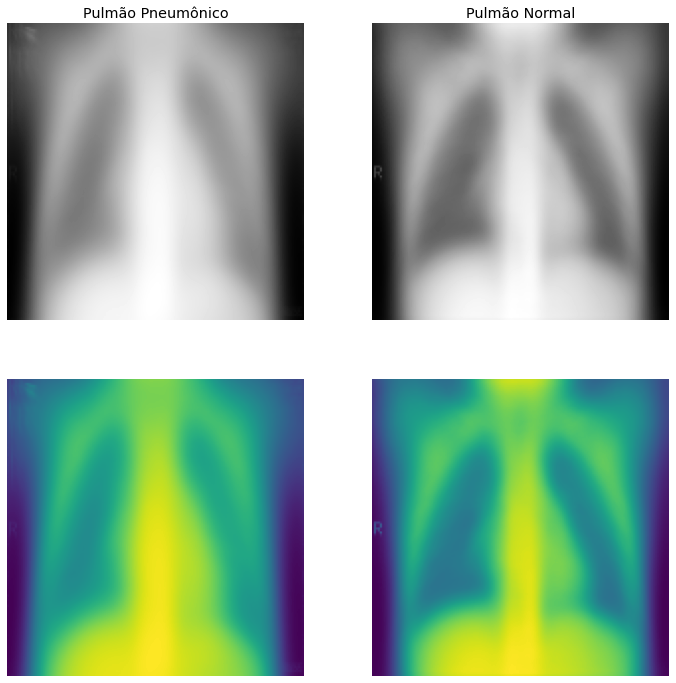

In [ ]:
"""Como forma de análise exploratória este plot apresenta o que seria a média 
de tonalidades de cada pixel de um pulmão com e sem pneumonia respectivamente.
Apresentado em duas tonalidades para que qualquer pessoa possa visualizar o contraste"""

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(pneumonia_media, cmap="gray")
plt.axis(False)
plt.title("Pulmão Pneumônico")

plt.subplot(222)
plt.imshow(normal_media, cmap="gray")
plt.axis(False)
plt.title("Pulmão Normal")

plt.subplot(223)
plt.axis(False)
plt.imshow(pneumonia_media)

plt.subplot(224)
plt.axis(False)
plt.imshow(normal_media)

plt.show()

Logistic Regression

In [ ]:
"""Redimensiona e extrai a informação do dataset novamente com intuito 
de remover qualquer alteração ja feita e ajustar para 150 x 150 pixels"""

img_size = 150
test_data, number_of_normal_test, number_of_pneumonia_test = images_manipulation('content/chest_xray/test')
train_data, number_of_normal_train, number_of_pneumonia_train = images_manipulation('content/chest_xray/train')

# randomiza toda a base de dados
np.random.shuffle(train_data)
np.random.shuffle(test_data)
X_train = train_data[:, 0]
X_test = test_data[:, 0]

# Para facilitar o trabalho, divide-se por 255, 
# com objetivo de quebrar a escala de cinza
X_train = [(img.flatten()/255.) for img in X_train]
y_train = train_data[:, 1].reshape(-1, 1)
X_test = [img.flatten()/255. for img in X_test]
y_test = test_data[:, 1].reshape(-1, 1)

# Dataframes prontos ([0]imagens de tonalidade 0->1)([1]Classificação )
dados_train = pd.DataFrame(X_train)
dados_train["Label"] = y_train
dados_test = pd.DataFrame(X_test)
dados_test["Label"] = y_test

In [ ]:
# Criação do Modelo Logístico através do Scikit-learn
logistic = LogisticRegression(max_iter=10000)
logistic.fit(dados_train.drop("Label", axis=1).values, dados_train.Label.astype(float))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Com o modelo pronto, aplica-se no Datafram de testes
predictions_logistic = logistic.predict(dados_test.drop("Label", axis=1).values)

Acurácia: 74.36%
Precision: 98.97%
Recall: 71.22%
F1 Score: 82.83%



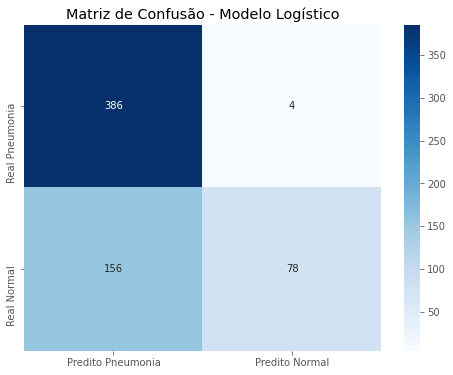

In [ ]:
def plot_results(modelo, predictions, color):
  """ 
  Função que recebe um de nossos modelos
  com sua respectiva predição, e retorna um plot da matriz de confusão
  """
  plt.figure(figsize=(8, 6))
  plt.title(f"Matriz de Confusão - Modelo {modelo}")
  sns.heatmap(confusion_matrix(dados_test.Label.astype(float), predictions),
            cmap=color,
            xticklabels=["Predito Pneumonia", "Predito Normal"],
            yticklabels=["Real Pneumonia", "Real Normal"],
            annot=True, # Argumentos de palavra-chave para matplotlib.axes.Axes.text()
            fmt='g'); # Código de formatação de string a ser usado ao adicionar anotações

def metrics(predictions):
  """
  Função que recebe a predição de um modelo qualquer e
  retorna as métricas (Accuracia, precisao, recall, F1 Score) 
  e os valores verdadeiro positivo, verdadeiro negativo,  falso positivo, 
  falso negativo da matriz de confusão.
  """
  [vp, fp], [fn, vn] = confusion_matrix(
      dados_test.Label.astype(float), 
      predictions)
    accuracy = (vp+vn)*100/(vp+fp+fn+vn)
    precision = vp*100/(vp+fp) 
    recall = vp*100/(vp+fn) 
    f1 = (2*precision*recall)/(precision+recall) 
    print(f"Acurácia: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%\n")
    
    return [vp, fp, fn, vn, accuracy, precision, recall, f1]

# Chama as funções de retorno de resultado principais.
plot_results("Logístico", predictions_logistic, "Blues")
[vp_logistic, 
 fp_logistic, 
 fn_logistic, 
 vn_logistic, 
 accuracy_logistic, 
 precision_logistic, 
 recall_logistic, 
 f1_logistic] = metrics(predictions_logistic)

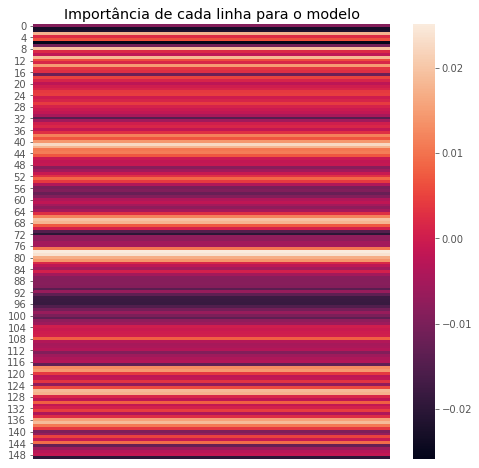

In [ ]:
# Criação de um plot com a importância de cada linha para o modelo logístico,
# com o intuito de auxiliar um profissional a encontrar os melhores pontos para
# achar a parte doente de um pulmão.
plt.figure(figsize=(8, 8))
plt.title("Importância de cada linha para o modelo")
sns.heatmap(logistic.coef_.reshape(150, 150).mean(axis=0).reshape(150, -1), xticklabels=False);

Dense Neural Network

In [ ]:
# Criação do Modelo De Redes Neurais Densas com o Tensorflow
model_dnn = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150*150, 1)), # Camada de linearização da matriz

    tf.keras.layers.Dense(128, activation='relu'), # Camada 1

    tf.keras.layers.Dense(128, activation='relu'), # Camada 2

    tf.keras.layers.Dropout(0.2), # Camada de Dropout

    tf.keras.layers.Dense(1, activation='sigmoid') # Camada de Retorno
])
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 22500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2880128   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,896,769
Trainable params: 2,896,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilação do Modelo com o Optimizer: Adam, 
# e Função de Perda: Binary Crossentropy
model_dnn.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
# Rodando o modelo com os dados
history = model_dnn.fit(
    dados_train.drop("Label", axis=1).values,
    dados_train.Label.astype(float),
    validation_split=.3,
    epochs = 10)

Epoch 1/10
115/115 [==============================] - 1s 9ms/step - loss: 0.5379 - accuracy: 0.8198 - val_loss: 0.2090 - val_accuracy: 0.9329
Epoch 2/10
115/115 [==============================] - 1s 6ms/step - loss: 0.2005 - accuracy: 0.9151 - val_loss: 0.2327 - val_accuracy: 0.9067
Epoch 3/10
115/115 [==============================] - 1s 6ms/step - loss: 0.1901 - accuracy: 0.9304 - val_loss: 0.1596 - val_accuracy: 0.9355
Epoch 4/10
115/115 [==============================] - 1s 6ms/step - loss: 0.1439 - accuracy: 0.9518 - val_loss: 0.1614 - val_accuracy: 0.9361
Epoch 5/10
115/115 [==============================] - 1s 6ms/step - loss: 0.1656 - accuracy: 0.9381 - val_loss: 0.2052 - val_accuracy: 0.9169
Epoch 6/10
115/115 [==============================] - 1s 6ms/step - loss: 0.1304 - accuracy: 0.9518 - val_loss: 0.1216 - val_accuracy: 0.9546
Epoch 7/10
115/115 [==============================] - 1s 6ms/step - loss: 0.1245 - accuracy: 0.9570 - val_loss: 0.1486 - val_accuracy: 0.9367
Epoch 

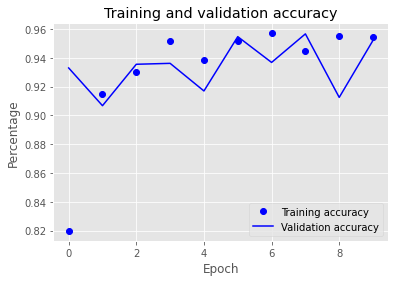

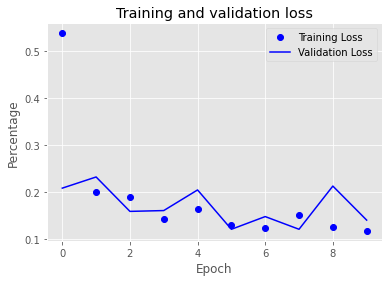

In [ ]:
# Plotando Performance de Treino do modelo
def training_performance(history, val=True):
    acc = history.history['accuracy']
    if val:
        val_acc = history.history['val_accuracy']
        val_loss = history.history['val_loss']
    loss = history.history['loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    if val:
        plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
        plt.title('Training and validation accuracy')
    else:
        plt.title('Training accuracy')

    plt.xlabel("Epoch")
    plt.ylabel("Percentage")
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    if val:
        plt.plot(epochs, val_loss, 'b', label='Validation Loss')
        plt.title('Training and validation loss')
    else:
        plt.title('Training loss')
        
    plt.xlabel("Epoch")
    plt.ylabel("Percentage")
    plt.legend()

    plt.show()

training_performance(history)

Acurácia: 76.12%
Precision: 98.46%
Recall: 72.87%
F1 Score: 83.75%



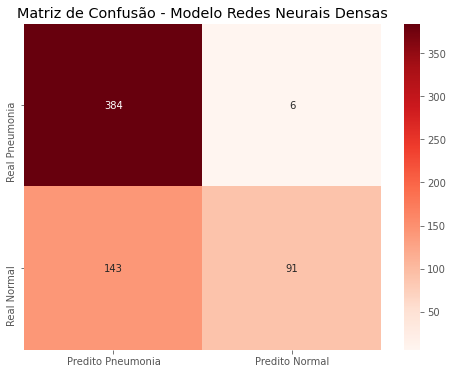

In [ ]:
# Predições da base de testes
predictions_dnn = model_dnn.predict_classes(dados_test.drop("Label", axis=1).values)

# Calculando Métricas
[vp_dnn, 
 fp_dnn, 
 fn_dnn, 
 vn_dnn, 
 accuracy_dnn, 
 precision_dnn, 
 recall_dnn, 
 f1_dnn] = metrics(predictions_dnn) 

# Plotando Resultados
plot_results("Redes Neurais Densas", predictions_dnn, "Reds")

Convolutional Neural Netowrk

In [ ]:
# Utilizando Data Augmentation para evitar overfitting do Modelo
X = dados_train.drop("Label", axis=1).values.reshape(-1, 150, 150, 1)
y = dados_train.Label.astype(float)

train_datagen = ImageDataGenerator(
    rotation_range = 30,  # Rotacionar a imagem até 30 graus de maneira aleatória
    zoom_range = 0.2, # Dando zoom na imagem de maneira aleatória
    width_shift_range=0.1,  # Deslocando a imagem horizontalmente de maneira aleatória
    height_shift_range=0.1,  # Deslocando a imagem verticalmente de maneira aleatória
    horizontal_flip = True)  # Espelhamento horizontal da imagem de maneira aleatória

train_datagen.fit(X)

In [ ]:
 model_cnn = tf.keras.models.Sequential([
    # Rede Neural Convolucional
    # Camada 1
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Camada 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Camada 3
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    # Camada 4
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Rede Neural Densa
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)      

In [ ]:
# Compilação do Modelo com o Optimizer: Adam, 
# e Função de Perda: Binary Crossentropy
model_cnn.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
# Treinando o modelo
history = model_cnn.fit(train_datagen.flow(X, y), epochs=20, batch_size=32)

Epoch 1/20
163/163 [==============================] - 13s 77ms/step - loss: 0.5172 - accuracy: 0.7632
Epoch 2/20
163/163 [==============================] - 13s 78ms/step - loss: 0.3254 - accuracy: 0.8568
Epoch 3/20
163/163 [==============================] - 12s 76ms/step - loss: 0.2623 - accuracy: 0.8880
Epoch 4/20
163/163 [==============================] - 12s 76ms/step - loss: 0.2270 - accuracy: 0.9051
Epoch 5/20
163/163 [==============================] - 12s 76ms/step - loss: 0.2070 - accuracy: 0.9147
Epoch 6/20
163/163 [==============================] - 13s 78ms/step - loss: 0.1930 - accuracy: 0.9239
Epoch 7/20
163/163 [==============================] - 12s 77ms/step - loss: 0.1719 - accuracy: 0.9344
Epoch 8/20
163/163 [==============================] - 12s 76ms/step - loss: 0.1727 - accuracy: 0.9371
Epoch 9/20
163/163 [==============================] - 12s 77ms/step - loss: 0.1720 - accuracy: 0.9327
Epoch 10/20
163/163 [==============================] - 12s 76ms/step - loss: 0.155

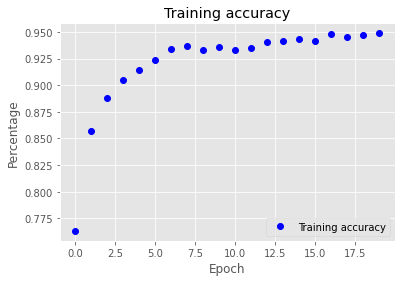

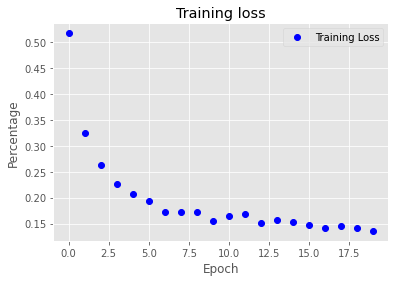

In [ ]:
# Plotando performance do modelo
training_performance(history, val=False)

Acurácia: 92.63%
Precision: 96.67%
Recall: 91.95%
F1 Score: 94.25%



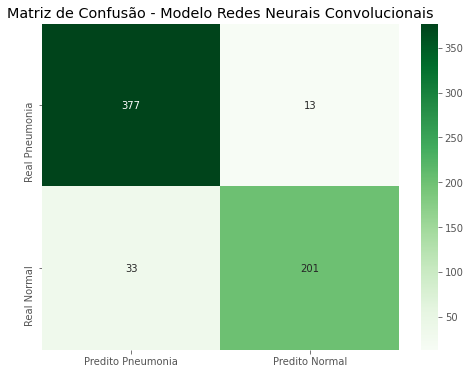

In [ ]:
# Predições da Base de Testes
predictions_cnn = model_cnn.predict_classes(dados_test.drop("Label", axis=1).values.reshape(-1, 150, 150, 1))

# Calculando as métricas
[vp_cnn, 
 fp_cnn, 
 fn_cnn, 
 vn_cnn, 
 accuracy_cnn, 
 precision_cnn, 
 recall_cnn, 
 f1_cnn] = metrics(predictions_cnn)

# Plotando Resultados
plot_results("Redes Neurais Convolucionais", predictions_cnn, "Greens")

Comparação entre os três modelos

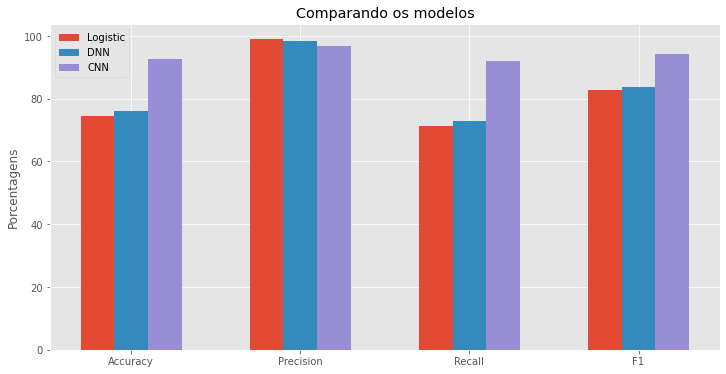

In [ ]:
# Criando Dicionário para o gráfico de barras
results_dictionary = {'Logístico':[accuracy_logistic, precision_logistic, recall_logistic, f1_logistic],
                      'RN Densa':[accuracy_dnn, precision_dnn, recall_dnn, f1_dnn],
                      'RN Convolucional':[accuracy_cnn, precision_cnn, recall_cnn, f1_cnn]}

fig, ax = plt.subplots(figsize=(12, 6))

labels = ['Accuracy', 'Precision', 'Recall', "F1"]

logistic_bar = results_dictionary["Logístico"]
dnn_bar = results_dictionary["RN Densa"]
cnn_bar = results_dictionary["RN Convolucional"]

x = np.arange(len(labels))
width = 0.2

# Plotando Resultados
ax.bar(x - width, logistic_bar, width, label='Logistic')
ax.bar(x, dnn_bar, width, label='DNN')
ax.bar(x + width, cnn_bar, width, label='CNN')

ax.set_ylabel('Porcentagens')
ax.set_title('Comparando os modelos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()